# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bid Side In Bitcoin Disappears Amidst Jittering “Macro Environment”.  Bitcoin is trading more than $10,000 per coin less than the current high, after according to one crypto analyst, the &#8220;bid&#8221; side of market has disappeared, exposing the cryptocurrency&#8217;s current weakness. The lack of buying currently could be due to what another analyst calls a jittering macro environment, referencing the stock and bond markets that [&#8230;] ... [| Skaityti daugiau](https://www.newsbtc.com/analysis/btc/bid-bitcoin-macro-environment/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Johnson & Johnson's single-shot COVID-19 vaccine endorsed by U.S. advisers | CBC News.  U.S. health advisers endorsed a one-dose COVID-19 vaccine from Johnson & Johnson on Friday, putting the country on the cusp of adding an easier-to-use option to fight the pandemic. The U.S. Food and Drug Administration is expected to quickly approve it for em… ... [| Skaityti daugiau](http://www.cbc.ca/news/health/johnson-johnson-covid19-vaccine-endorsed-us-advisers-1.5930231) 

### Kainų kaita pandemijos metu

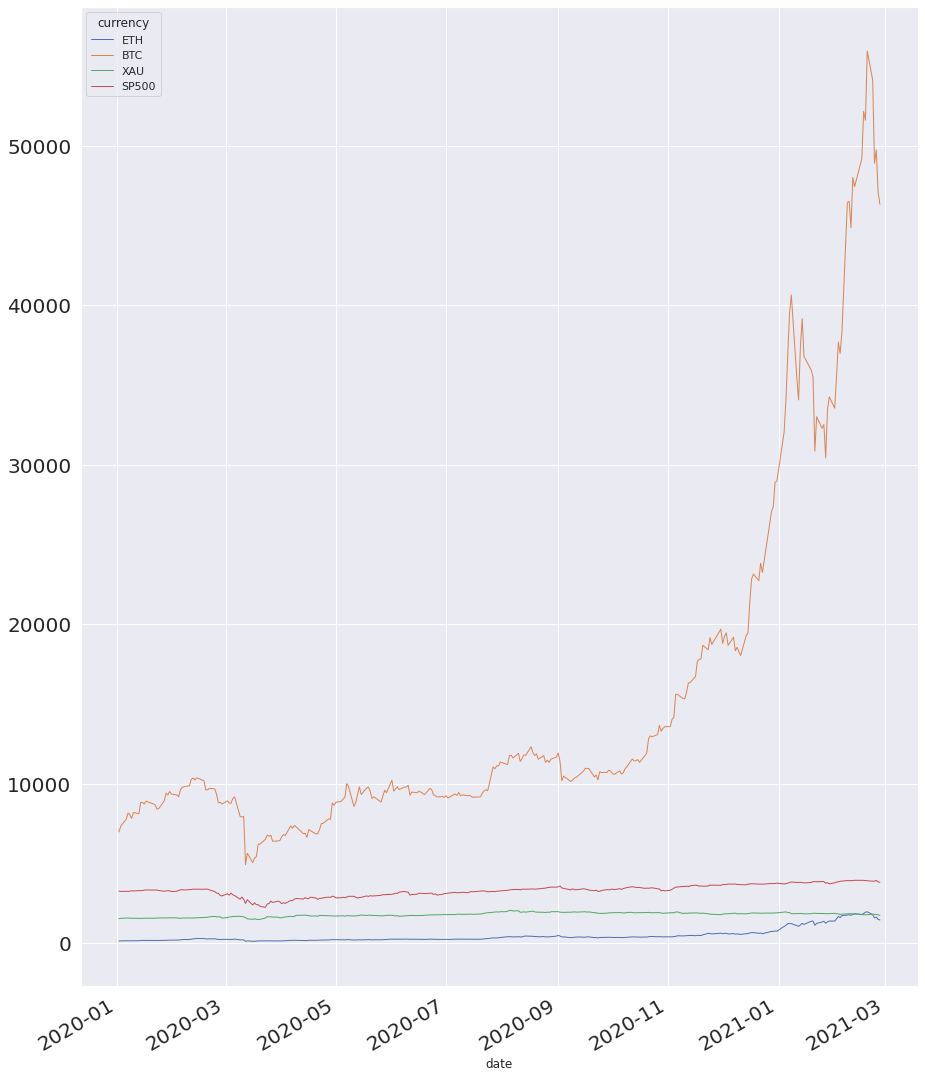

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.981254,0.345230,0.752188
BTC,0.981254,1.000000,0.303683,0.756309
XAU,0.345230,0.303683,1.000000,0.544662
SP500,0.752188,0.756309,0.544662,1.000000


In [8]:
#hide ### Koreliacijos matrica.

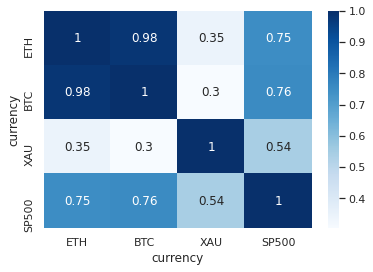

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')